## Bayesian Analaysis of Drug Testing
Ilyas Ustun


A drug company would like to introduce a drug to reduce acid indigestion. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. The company interviews n people and Y of them say that they will buy the drug. 

If in the past new drugs tend to capture a proportion between say .05 and .15 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(.05, .15)$

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.1
Running on ArviZ v0.11.2


In [4]:
observed = 20

with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.05, upper=0.15)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta, n=100, observed=observed)

    # Posterior
    # draw 10000 posterior samples
    trace = pm.sample(draws=1000, tune=500, chains=4)

C:\Users\ilyas\Anaconda3\envs\pymc\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 20 seconds.


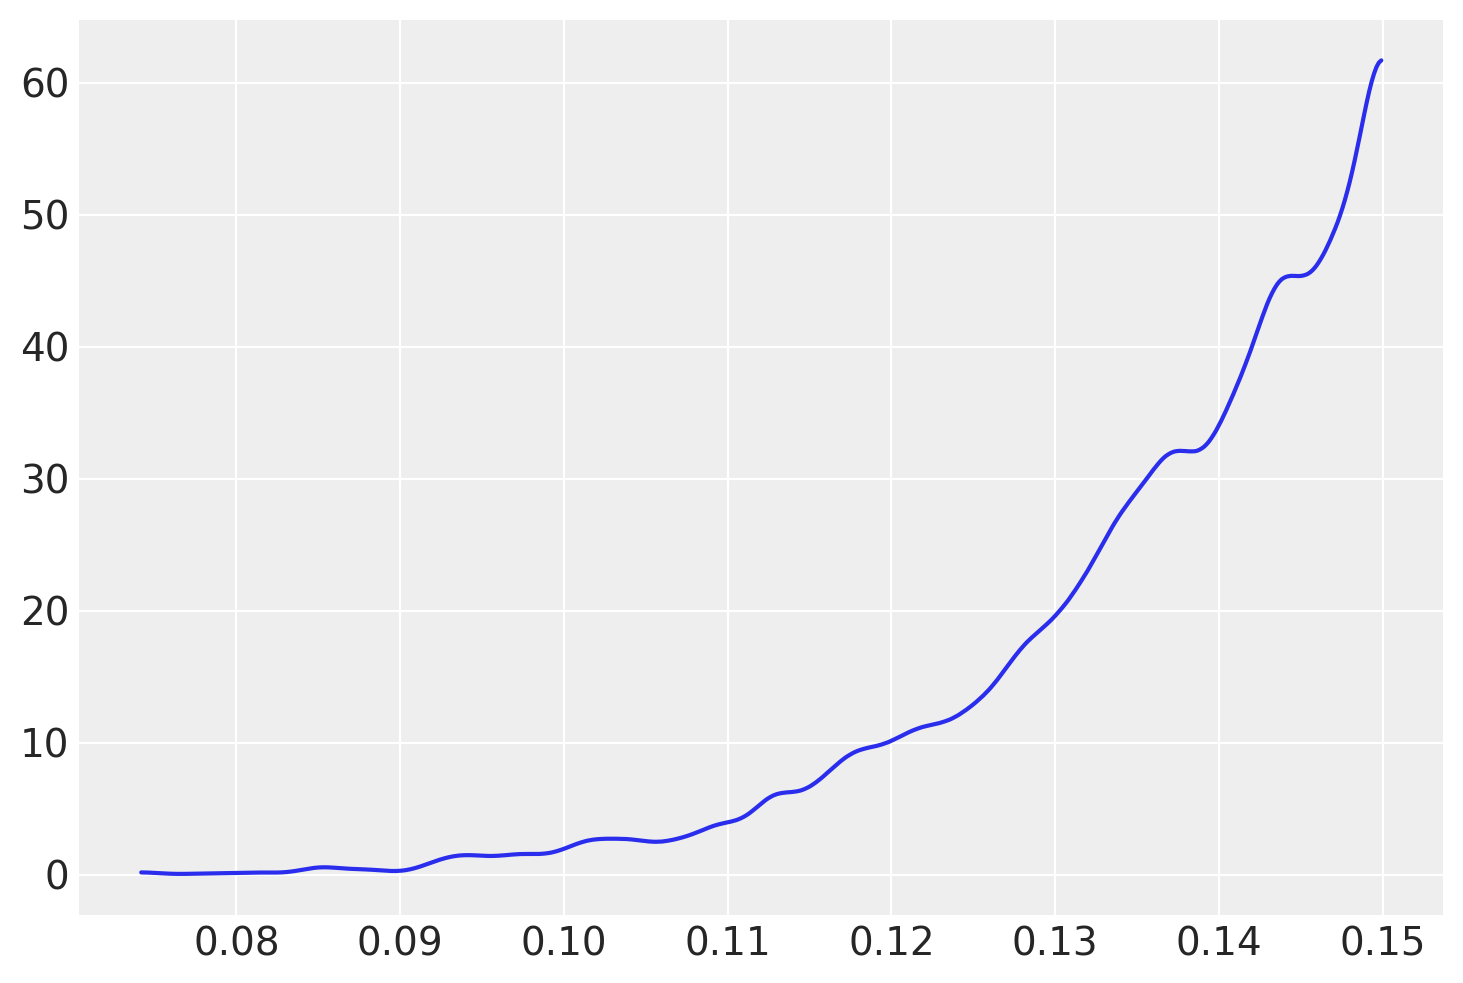

In [20]:
with model:
    az.plot_dist(trace['theta'])

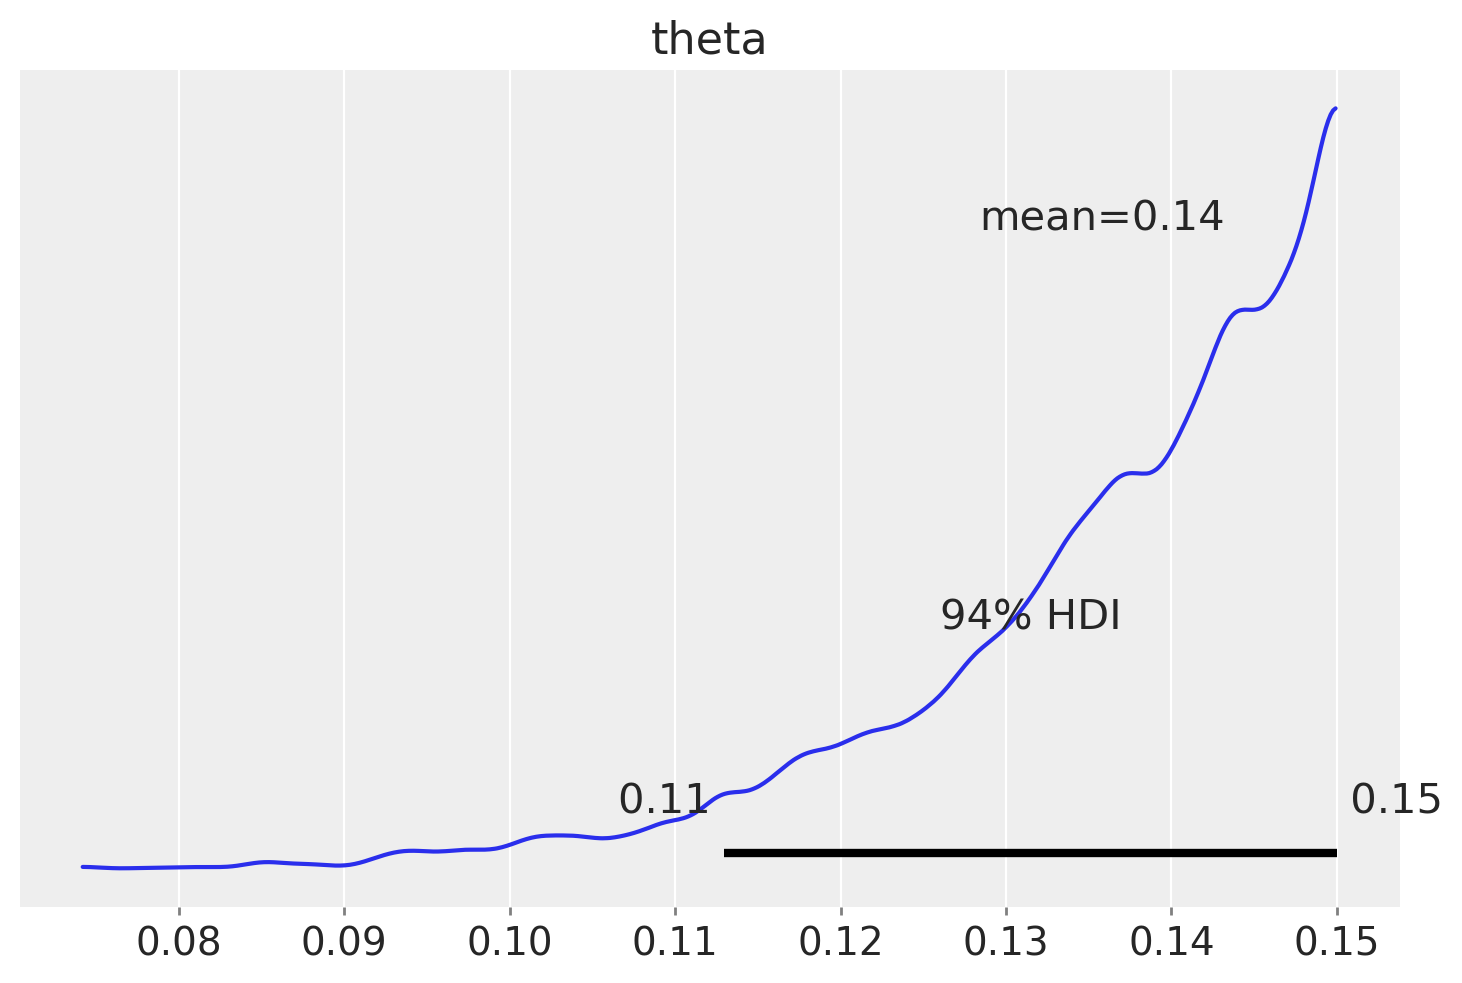

In [19]:
with model:
    az.plot_posterior(trace)

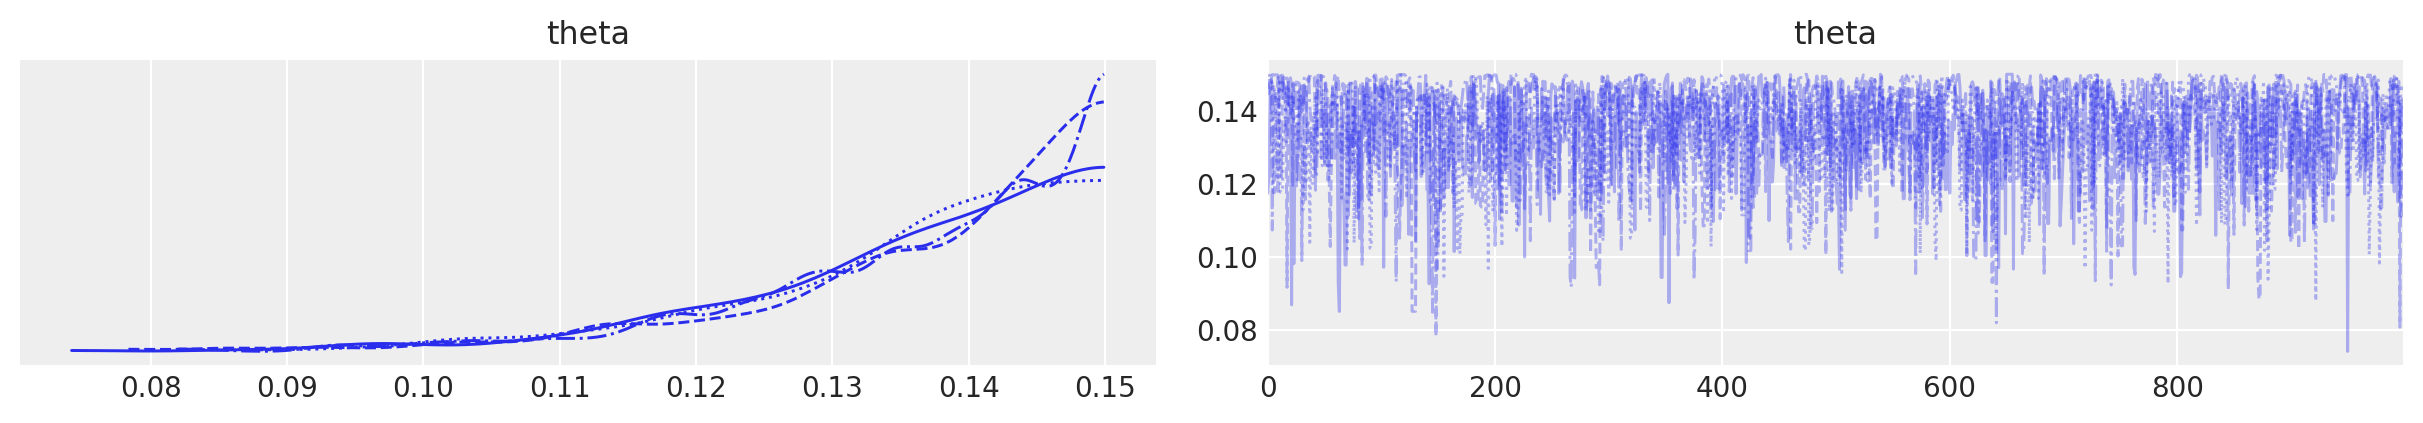

In [18]:
with model:
    az.plot_trace(trace);

Above plot shows a simulation from the posterior distribution of theta

In [11]:
trace['theta'][-20:]

array([0.11342054, 0.13738371, 0.13722526, 0.13784923, 0.14381439,
       0.13460351, 0.13655208, 0.13655208, 0.13615457, 0.1424079 ,
       0.13889275, 0.1493634 , 0.14984699, 0.14982008, 0.14586037,
       0.14067629, 0.13846604, 0.11106223, 0.1387049 , 0.13517201])

In [8]:
pm.trace_to_dataframe(trace)

,theta
0,0.117370
1,0.121454
2,0.143836
3,0.148498
4,0.149922
...,...
3995,0.140676
3996,0.138466
3997,0.111062
3998,0.138705


In [27]:
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.05, upper=0.95)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta, n=100, observed=35)

    # Posterior
    # draw 1000 posterior samples
    trace = pm.sample(draws=1000, tune=500)

C:\Users\ilyas\Anaconda3\envs\pymc\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 18 seconds.


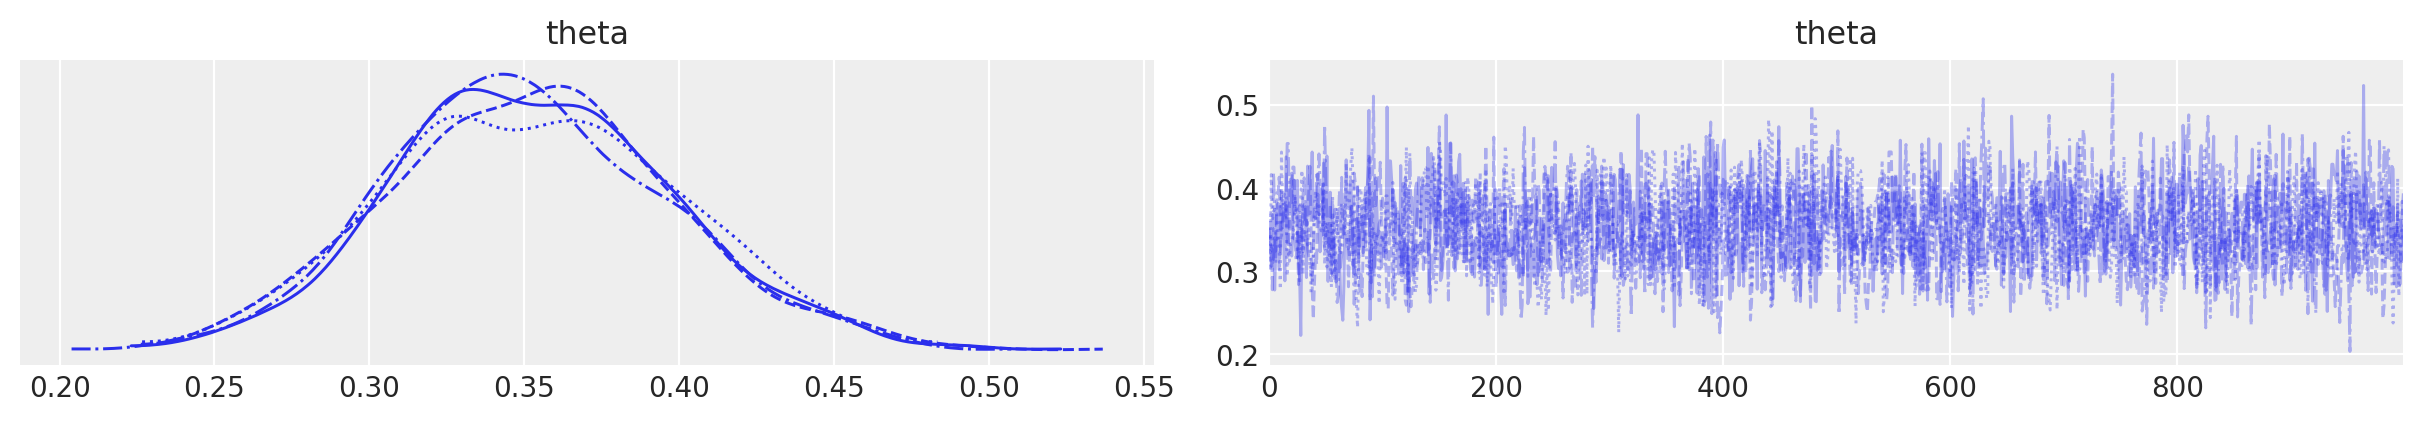

In [28]:
with model:
    az.plot_trace(trace);

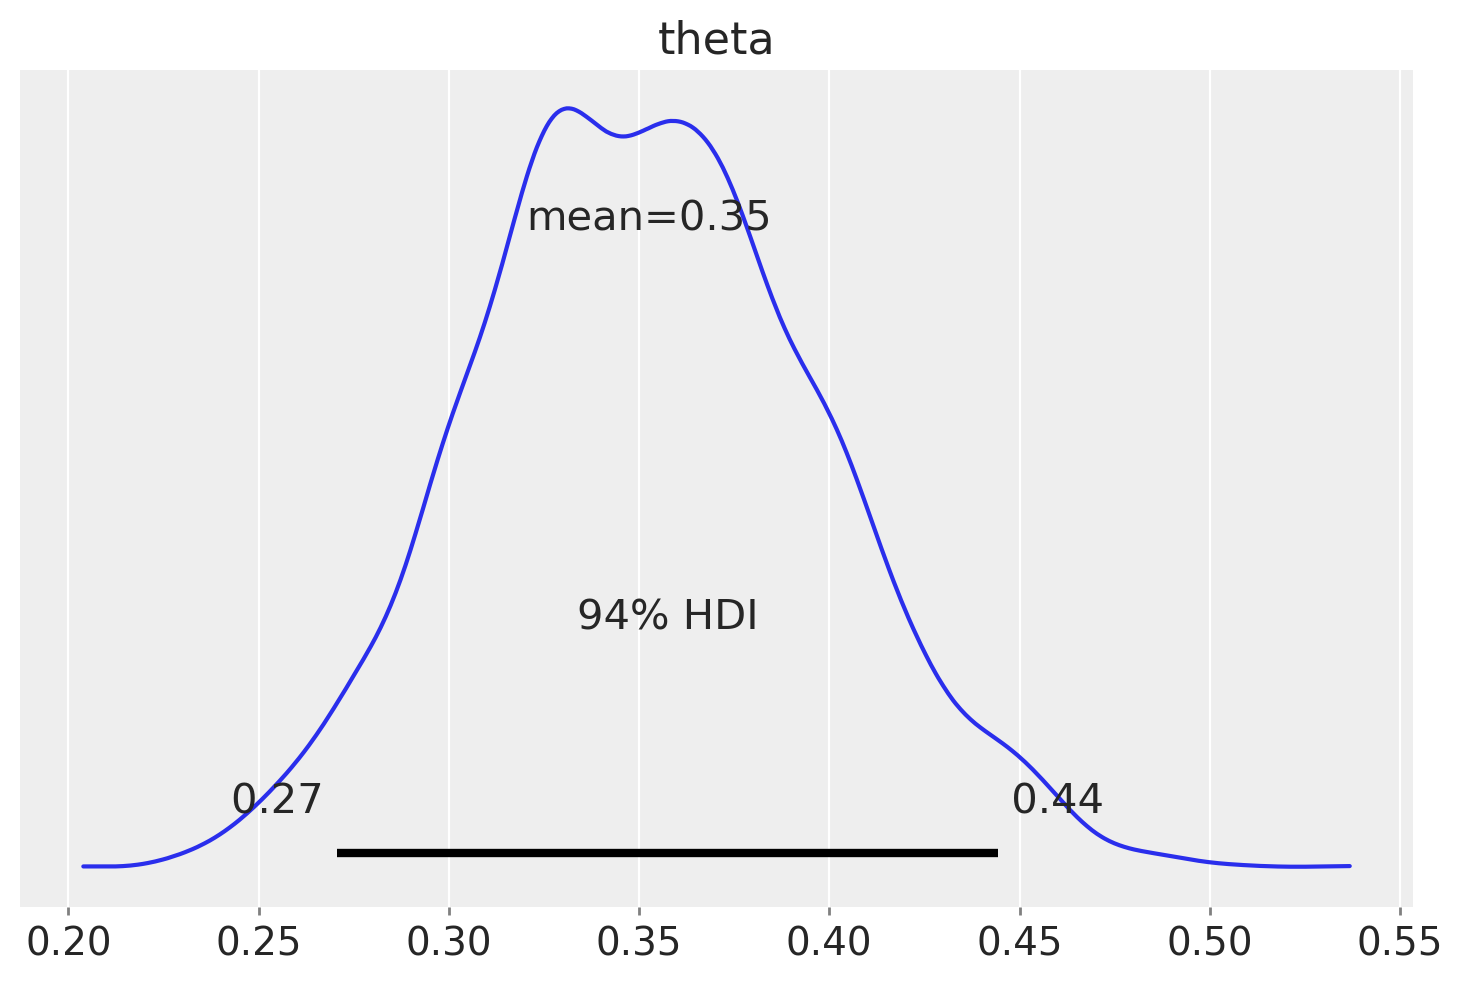

In [29]:
with model:
    az.plot_posterior(trace)